# Python Class Group Presentation
### Contributors:
1. Danielle Adamo
2. Nicole Davila
3. Anting Wang
4. Kun Berdow
5. Peiyun Zhu

### Date: 2019-11-19

## Part I. Getting the tweets and saving the results into a csv file

In [1]:
# Import required libraries
from textblob import TextBlob
import tweepy
from googletrans import Translator
import pandas as pd
import numpy as np
import csv
import re
from pandas import Series, DataFrame
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# Define keys
consumer_key= 'ommitted for security'
consumer_secret= 'ommitted for security'

In [3]:
# Define tokens
access_token='ommtted for security'
access_token_secret='ommitted for security'

In [4]:
# Get authorization
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [5]:
# Create api variable
api = tweepy.API(auth)

In [7]:
# Create an empty list to store all tweets    
candidate_tweets = []

In [8]:
# Append all tweet data to list
# Let's use the ten most popular Democratic Party Candidates for our query
for tweet in tweepy.Cursor(api.search, q = ['@ewarren OR @JoeBiden OR @SenSanders OR @PeteButtigieg OR @KamalaHarris OR @AndrewYang OR @BetoORourke OR @CoryBooker OR @amyklobuchar OR @JulianCastro']).items(10):
    tweets2.append(tweet)

In [9]:
# Convert 'tweets' list to pandas.DataFrame
tweets_df = pd.DataFrame(vars(tweets2[i]) for i in range(len(tweets2)))

In [10]:
# Use the 'text' column to conduct the sentiment analysis and store in two new columns ('polarity' and 'subjectivity')
tweets_df[['polarity', 'subjectivity']] = tweets_df['text'].apply(lambda text: pd.Series(TextBlob(text).sentiment))

In [11]:
# Define file path to save csv file to
FILE_PATH = 'C:/Users/nicol/OneDrive/Public/Email attachments/Documents/Python Codes/myTweets.csv'

In [ ]:
# Use pandas to save dataframe to csv
tweets_df.to_csv(FILE_PATH)

Part II. Interpreting the results

In [12]:
# Read file
tweets = pd.read_csv(FILE_PATH)

In [5]:
# See first few rows of the data frame
tweets.head()

,Unnamed: 0,_api,_json,created_at,id,id_str,text,truncated,entities,metadata,...,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,quoted_status,possibly_sensitive,extended_entities,polarity,subjectivity
0,0,<tweepy.api.API object at 0x00000116DCF5A780>,{'created_at': 'Fri Oct 25 18:27:13 +0000 2019...,2019-10-25 18:27:13,1187797779617374215,1187797779617374215,RT @JoeBiden: Donald Trump lacks the moral aut...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...",...,False,False,en,NaN,NaN,NaN,NaN,NaN,0.000000,0.250000
1,1,<tweepy.api.API object at 0x00000116DCF5A780>,{'created_at': 'Fri Oct 25 18:27:13 +0000 2019...,2019-10-25 18:27:13,1187797779013234688,1187797779013234688,RT @KamalaHarris: As Chairman Elijah Cummings ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...",...,False,False,en,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2,2,<tweepy.api.API object at 0x00000116DCF5A780>,{'created_at': 'Fri Oct 25 18:27:13 +0000 2019...,2019-10-25 18:27:13,1187797777549615105,1187797777549615105,RT @BetoORourke: Don't become numb to these nu...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...",...,False,False,en,NaN,NaN,NaN,NaN,NaN,-0.088889,0.611111
3,3,<tweepy.api.API object at 0x00000116DCF5A780>,{'created_at': 'Fri Oct 25 18:27:12 +0000 2019...,2019-10-25 18:27:12,1187797774441447424,1187797774441447424,RT @BetoORourke: Don't become numb to these nu...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...",...,False,False,en,NaN,NaN,NaN,NaN,NaN,-0.088889,0.611111
4,4,<tweepy.api.API object at 0x00000116DCF5A780>,{'created_at': 'Fri Oct 25 18:27:11 +0000 2019...,2019-10-25 18:27:11,1187797771895619584,1187797771895619584,RT @MBjorklund1963: You're an idiot @KamalaHar...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...",...,False,False,en,NaN,NaN,NaN,NaN,NaN,-1.000000,0.800000


In [7]:
# Identify null values
pd.isnull(tweets)

,Unnamed: 0,_api,_json,created_at,id,id_str,text,truncated,entities,metadata,...,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,quoted_status,possibly_sensitive,extended_entities,polarity,subjectivity
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28963,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,False,False
28964,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,False,False
28965,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,False,False
28966,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,False,False


In [8]:
# What type of object is tweets?
type(tweets)

pandas.core.frame.DataFrame

In [9]:
# List columns
tweets.columns

Index(['Unnamed: 0', '_api', '_json', 'created_at', 'id', 'id_str', 'text',
       'truncated', 'entities', 'metadata', 'source', 'source_url',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'author', 'user', 'geo', 'coordinates',
       'place', 'contributors', 'retweeted_status', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status',
       'possibly_sensitive', 'extended_entities', 'polarity', 'subjectivity'],
      dtype='object')

In [10]:
# For each candidate, create a column with just their last name if their tweeter username is in the 'text' column
tweets.loc[tweets['text'].str.contains("@ewarren"),'mention1'] = 'Warren'
tweets.loc[tweets['text'].str.contains("@KamalaHarris"),'mention1'] = 'Harris'
tweets.loc[tweets['text'].str.contains("@JoeBiden"),'mention1'] = 'Biden'
tweets.loc[tweets['text'].str.contains("@SenSanders"),'mention1'] = 'Sanders'
tweets.loc[tweets['text'].str.contains("@PeteButtigieg"),'mention1'] = 'Buttigieg'
tweets.loc[tweets['text'].str.contains("@AndrewYang"),'mention1'] = 'Yang'
tweets.loc[tweets['text'].str.contains("@CoryBooker"),'mention1'] = 'Booker'
tweets.loc[tweets['text'].str.contains("@BetoORourke"),'mention1'] = 'ORourke'
tweets.loc[tweets['text'].str.contains("@CoryBooker"),'mention1'] = 'Booker'
tweets.loc[tweets['text'].str.contains("@amyklobuchar"),'mention1'] = 'Klobuchar'
tweets.loc[tweets['text'].str.contains("@JulianCastro"),'mention1'] = 'Castro'

In [11]:
# See which rows in the text column contain '@JoeBiden'
tweets['text'].str.contains("@JoeBiden")

0         True
1        False
2        False
3        False
4        False
         ...  
28963    False
28964     True
28965     True
28966     True
28967    False
Name: text, Length: 28968, dtype: bool

In [12]:
# Let's take a look at the new column
tweets.head()

,Unnamed: 0,_api,_json,created_at,id,id_str,text,truncated,entities,metadata,...,retweeted,lang,quoted_status_id,quoted_status_id_str,quoted_status,possibly_sensitive,extended_entities,polarity,subjectivity,mention1
0,0,<tweepy.api.API object at 0x00000116DCF5A780>,{'created_at': 'Fri Oct 25 18:27:13 +0000 2019...,2019-10-25 18:27:13,1187797779617374215,1187797779617374215,RT @JoeBiden: Donald Trump lacks the moral aut...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...",...,False,en,NaN,NaN,NaN,NaN,NaN,0.000000,0.250000,Biden
1,1,<tweepy.api.API object at 0x00000116DCF5A780>,{'created_at': 'Fri Oct 25 18:27:13 +0000 2019...,2019-10-25 18:27:13,1187797779013234688,1187797779013234688,RT @KamalaHarris: As Chairman Elijah Cummings ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...",...,False,en,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,Harris
2,2,<tweepy.api.API object at 0x00000116DCF5A780>,{'created_at': 'Fri Oct 25 18:27:13 +0000 2019...,2019-10-25 18:27:13,1187797777549615105,1187797777549615105,RT @BetoORourke: Don't become numb to these nu...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...",...,False,en,NaN,NaN,NaN,NaN,NaN,-0.088889,0.611111,ORourke
3,3,<tweepy.api.API object at 0x00000116DCF5A780>,{'created_at': 'Fri Oct 25 18:27:12 +0000 2019...,2019-10-25 18:27:12,1187797774441447424,1187797774441447424,RT @BetoORourke: Don't become numb to these nu...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...",...,False,en,NaN,NaN,NaN,NaN,NaN,-0.088889,0.611111,ORourke
4,4,<tweepy.api.API object at 0x00000116DCF5A780>,{'created_at': 'Fri Oct 25 18:27:11 +0000 2019...,2019-10-25 18:27:11,1187797771895619584,1187797771895619584,RT @MBjorklund1963: You're an idiot @KamalaHar...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...",...,False,en,NaN,NaN,NaN,NaN,NaN,-1.000000,0.800000,Harris


Text(0.5, 0, 'candidates tweets percentage')

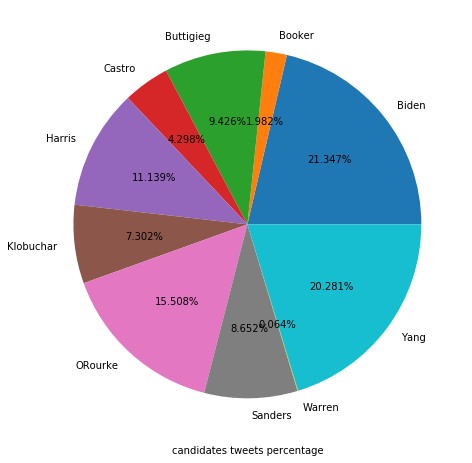

In [15]:
# Pie chart of the count of tweets each candidate has
t_counts = tweets['polarity'].groupby(tweets['mention1']).count()
t_counts = t_counts / sum(t_counts)

plt.figure(figsize = (8, 8))
colors = ['red','pink','magenta','purple','orange']
plt.pie(x=t_counts, labels=t_counts.index, autopct='%.3f%%')
plt.xlabel('candidates tweets percentage')

In [16]:
# Plarity distribution, grouped by candidate 
tweets['polarity'].groupby(tweets['mention1']).describe().T

mention1,Biden,Booker,Buttigieg,Castro,Harris,Klobuchar,ORourke,Sanders,Warren,Yang
count,5707.000000,530.000000,2520.000000,1149.000000,2978.000000,1952.000000,4146.000000,2313.000000,17.000000,5422.000000
mean,0.108824,0.117070,0.104305,0.175702,0.104051,0.019913,-0.030150,-0.167095,-0.113725,0.137516
std,0.241486,0.223985,0.274340,0.272265,0.312089,0.262012,0.212591,0.283435,0.117996,0.260905
min,-1.000000,-0.800000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.475000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,-0.400000,-0.166667,0.000000
50%,0.000000,0.175000,0.000000,0.000000,0.000000,0.000000,-0.088889,-0.300000,-0.125000,0.000000
75%,0.300000,0.175000,0.216667,0.462500,0.250000,0.168182,0.000000,0.000000,0.000000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000


In [17]:
# Subjectivity distribution, grouped by candidate
tweets['subjectivity'].groupby(tweets['mention1']).describe().T

mention1,Biden,Booker,Buttigieg,Castro,Harris,Klobuchar,ORourke,Sanders,Warren,Yang
count,5707.000000,530.000000,2520.000000,1149.000000,2978.000000,1952.000000,4146.000000,2313.000000,17.000000,5422.000000
mean,0.382893,0.524885,0.315706,0.392501,0.272799,0.352178,0.357397,0.456800,0.399510,0.351653
std,0.359944,0.385511,0.330574,0.419563,0.338098,0.346760,0.302682,0.295439,0.355713,0.319945
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000
50%,0.250000,0.775000,0.233333,0.200000,0.000000,0.327273,0.366667,0.650000,0.375000,0.387500
75%,0.666667,0.775000,0.583333,0.750000,0.581250,0.600000,0.611111,0.650000,0.833333,0.566667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,1.000000


In [18]:
# Compute the mean polarity and subjectivity grouped by candidate
mean = tweets.groupby('mention1').mean()
mean_polarity = mean['polarity']
mean_subjectivity = mean['subjectivity']

In [19]:
# Let us take a look at the average polarity
mean_polarity

mention1
Biden        0.108824
Booker       0.117070
Buttigieg    0.104305
Castro       0.175702
Harris       0.104051
Klobuchar    0.019913
ORourke     -0.030150
Sanders     -0.167095
Warren      -0.113725
Yang         0.137516
Name: polarity, dtype: float64

Text(0, 0.5, 'candidate')

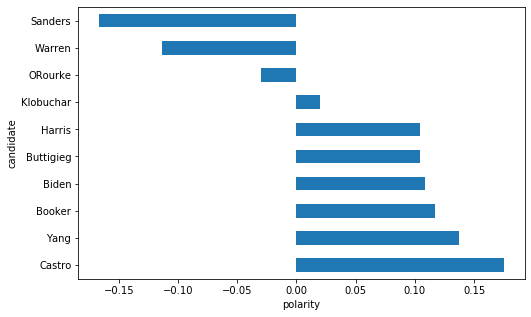

In [20]:
# Bar chart of mean polarity grouped by candidate 
plt.figure(figsize = (8, 5))
mean_polarity.sort_values(ascending = False).plot(kind = 'barh')
plt.xlabel('polarity')
plt.ylabel('candidate')

In [21]:
# Let us take a look at the average subjectivity
mean_subjectivity

mention1
Biden        0.382893
Booker       0.524885
Buttigieg    0.315706
Castro       0.392501
Harris       0.272799
Klobuchar    0.352178
ORourke      0.357397
Sanders      0.456800
Warren       0.399510
Yang         0.351653
Name: subjectivity, dtype: float64

Text(0, 0.5, 'candidate')

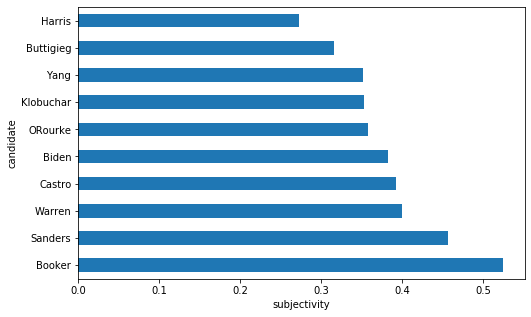

In [22]:
# Bar chart of mean subjectivity grouped by candidate
plt.figure(figsize = (8, 5))
mean_subjectivity.sort_values(ascending = False).plot(kind = 'barh')
plt.xlabel('subjectivity')
plt.ylabel('candidate')

Text(0.5, 0, 'candidate')

<Figure size 576x360 with 0 Axes>

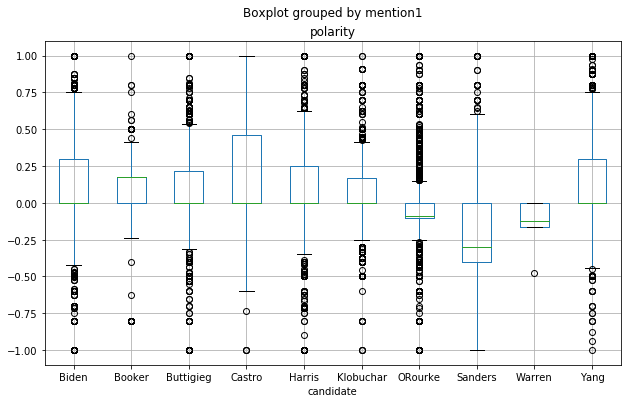

In [23]:
# Boxplot of polarity grouped by candidate 
plt.figure(figsize = (8, 5))
tweets.boxplot(column='polarity',by='mention1',figsize = (10, 6))
plt.xlabel('candidate')

Text(0.5, 0, 'candidate')

<Figure size 576x360 with 0 Axes>

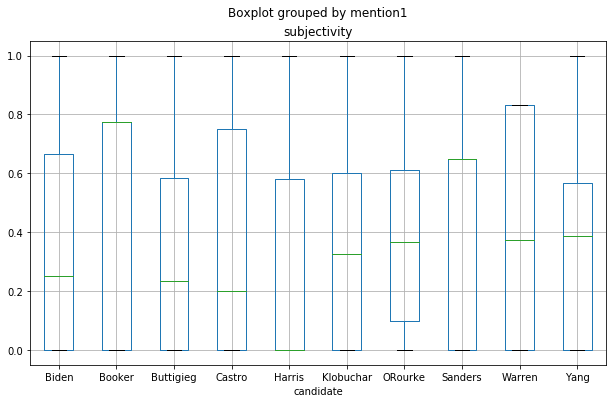

In [24]:
# Boxplot of subjectivity grouped by candidate
plt.figure(figsize = (8, 5))
tweets.boxplot(column='subjectivity',by='mention1',figsize = (10, 6))
plt.xlabel('candidate')